In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
dataframe = pd.read_csv("marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv", sep="\t")
dataframe.head()

Uniq Id            Crawl Timestamp  \
0  1705736792d82aa2f2d3caf1c07c53f4  2020-09-24 03:21:12 +0000   
1  95a9fe6f4810fcfc7ff244fd06784f11  2020-10-30 14:04:08 +0000   
2  8d4d0330178d3ed181b15a4102b287f2  2020-08-06 05:51:47 +0000   
3  fddc4df45b35efd886794b261f730c51  2020-07-15 11:22:04 +0000   
4  0990cf89a59ca6a0460349a3e4f51d42  2020-11-26T12:27:20+00:00   

   Dataset Origin                        Product Id  Product Barcode  \
0             NaN  2e17bf4acecdece67fc00f07ad62c910              NaN   
1             NaN  076e5854a62dd283c253d6bae415af1f              NaN   
2             NaN  8a4fe5d9c7a6ed26cc44d785a454b124              NaN   
3             NaN  03b5fb878a33eadff8b033419eab9669              NaN   
4             NaN  ce3d761e57d6ccad80619297b5b1bcbc              NaN   

  Product Company Type Source Product Brand Source  \
0                  Competitor                  NaN   
1                  Competitor                  NaN   
2                  Competitor                  NaN   
3                  Competitor                  NaN   
4                  Competitor                  NaN   

  Product Brand Normalised Source Product Name Source  Match Rank  ...  \
0                             NaN                 NaN         NaN  ...   
1                             NaN                 NaN         NaN  ...   
2                             NaN                 NaN         NaN  ...   
3                             NaN                 NaN         NaN  ...   
4                             NaN                 NaN         NaN  ...   

   Product Currency  Product Available Inventory  \
0               USD                    111111111   
1               USD                    111111111   
2               USD                    111111111   
3               USD                    111111111   
4               USD                    111111111   

                                   Product Image Url Product Model Number  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...                  NaN   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...                  NaN   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...                  NaN   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...                  NaN   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...                  NaN   

                                        Product Tags Product Contents  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...              NaN   
1  Nice 'n Easy Permanent Color, 111 Natural Medi...              NaN   
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...              NaN   
3  Kokie Professional Matte Lipstick, Hot Berry, ...              NaN   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...              NaN   

   Product Rating  Product Reviews Count  Bsr  \
0             NaN                    NaN  NaN   
1             NaN                    NaN  NaN   
2             4.5                29221.0  NaN   
3             NaN                    NaN  NaN   
4             NaN                  131.0  NaN   

                        Joining Key  
0  81350af1be98d3753cf964709f0c766a  
1  0353e63907dc0de0c734db4690300057  
2  b6985c8e94815fbca2319dbb8bf228af  
3  85b70fded09186f00467cea2f935b779  
4  41c870871328e97da6fb036bb7d4b2da  

[5 rows x 32 columns]

In [3]:
dataframe.shape

(5000, 32)

In [4]:
dataframe.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [5]:
df = dataframe[["Uniq Id", "Product Id", "Product Category", "Product Brand", "Product Name", "Product Description", "Product Price", "Product Image Url", "Product Tags", "Product Rating", "Product Reviews Count"]]
df.head()

Uniq Id                        Product Id  \
0  1705736792d82aa2f2d3caf1c07c53f4  2e17bf4acecdece67fc00f07ad62c910   
1  95a9fe6f4810fcfc7ff244fd06784f11  076e5854a62dd283c253d6bae415af1f   
2  8d4d0330178d3ed181b15a4102b287f2  8a4fe5d9c7a6ed26cc44d785a454b124   
3  fddc4df45b35efd886794b261f730c51  03b5fb878a33eadff8b033419eab9669   
4  0990cf89a59ca6a0460349a3e4f51d42  ce3d761e57d6ccad80619297b5b1bcbc   

                                    Product Category    Product Brand  \
0  Premium Beauty > Premium Makeup > Premium Nail...              OPI   
1  Beauty > Hair Care > Hair Color > Auburn Hair ...      Nice'n Easy   
2  Beauty > Hair Care > Hair Color > Permanent Ha...          Clairol   
3                              Beauty > Makeup > Lip  Kokie Cosmetics   
4  Seasonal > Stock Up Essentials > Personal Care...         Gillette   

                                        Product Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   
2  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Professional Matte Lipstick, Hot Berry, ...   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                 Product Description  Product Price  \
0                                                NaN           8.95   
1  Pack of 3 Pack of 3 for the UPC: 381519000201 ...          29.86   
2  This Clairol Nice N Easy Permanent Color gives...           7.99   
3  Calling all matte lip lovers! Indulge in our r...           5.16   
4  In 1971, Gillette introduced the Trac II razor...          19.97   

                                   Product Image Url  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                        Product Tags  Product Rating  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...             NaN   
1  Nice 'n Easy Permanent Color, 111 Natural Medi...             NaN   
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...             4.5   
3  Kokie Professional Matte Lipstick, Hot Berry, ...             NaN   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...             NaN   

   Product Reviews Count  
0                    NaN  
1                    NaN  
2                29221.0  
3                    NaN  
4                  131.0

In [6]:
df.shape

(5000, 11)

In [7]:
df.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Category           10
Product Brand              13
Product Name                0
Product Description      1127
Product Price              42
Product Image Url           0
Product Tags                0
Product Rating           2806
Product Reviews Count    1654
dtype: int64

In [8]:
# Filling the missing values
df["Product Rating"].fillna(0, inplace=True)
df["Product Category"].fillna("", inplace=True)
df["Product Brand"].fillna("", inplace=True)
df["Product Description"].fillna("", inplace=True)
df["Product Reviews Count"].fillna(0, inplace=True)

C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\1690738160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Product Rating"].fillna(0, inplace=True)
C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\1690738160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Product Category"].fillna("", inplace=True)
C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\1690738160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pro

In [9]:
df.dropna(axis=0, inplace=True)

C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\2089189907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


In [10]:
df.isnull().sum()

Uniq Id                  0
Product Id               0
Product Category         0
Product Brand            0
Product Name             0
Product Description      0
Product Price            0
Product Image Url        0
Product Tags             0
Product Rating           0
Product Reviews Count    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
# give simple names to columns
column_name = {
    "Uniq Id": "ID",
    "Product Id": "ProdID",
    "Product Rating": "Rating",
    "Product Reviews Count": "ReviewCount",
    "Product Category": "Category",
    "Product Brand": "Brand",
    "Product Name": "Name",
    "Product Image Url": "ImageURL",
    "Product Description": "Description",
    "Product Price": "Price",
    "Product Tags": "Tags"
}

In [14]:
# Rename the columns
df.rename(columns=column_name, inplace=True)

C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\3881339913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_name, inplace=True)


In [15]:
df.tail()

ID                            ProdID  \
4953  2771f0606e9638de508741f52029d51c  ad208aa8da338e84dfcf13efd49e8a75   
4954  0f218eb3ac736975ccfdde987baa4b83  1be8241fd6249f7ee007b06afd7ff45d   
4955  34d1aa70845416c3df059a088aaf18dc  96ed378fb9466b11abde8f9baea58844   
4956  ff9cfa22550bf036e2487a9100d927f1  f7b05869f3ee7fe22864ea58cbb006d1   
4957  0de862f8c1c4f23b6c4cfe59fd574b59  1c9e4943fd915f7b016cdc593e607e02   

                                               Category          Brand  \
4953  Household Essentials > Air Fresheners > Spray ...  Eclectic Lady   
4954  Beauty > Hair Care > Hair Color > Permanent Ha...        Garnier   
4955                            Beauty > Makeup > Nails       Stoneway   
4956  Premium Beauty > Premium Bath & Body > Premium...          Creed   
4957  Beauty > Makeup > Face Makeup > Face Makeup Br...      COVERGIRL   

                                                   Name  \
4953  Garden Mint Room Spray (Double Strength), 4 ou...   
4954  Garnier Nutrisse Nourishing Hair Color Creme (...   
4955  Nail File Electric Drill, 6 in 1 Professional ...   
4956  Creed Love In Black Hair And Body Wash 6.8oz/2...   
4957                                         Foundation   

                                            Description  Price  \
4953  Garden Mint is a lovely blend of spearmint, le...  14.99   
4954  Garnier Nutrisse Nourishing Hair Color Creme B...   4.44   
4955  Multifunctional : Our nail drill kit come with...  15.78   
4956                                                     32.99   
4957  Mousse foundation that gives you a smooth clea...  17.94   

                                               ImageURL  \
4953  https://i5.walmartimages.com/asr/0e0416ae-6b70...   
4954  https://i5.walmartimages.com/asr/24d7a837-51f8...   
4955  https://i5.walmartimages.com/asr/d6202179-2c93...   
4956  https://i5.walmartimages.com/asr/3dc99239-66d2...   
4957  https://i5.walmartimages.com/asr/a76122fd-322a...   

                                                   Tags  Rating  ReviewCount  
4953  Garden Mint Room Spray (Double Strength), 4 ou...     4.5          2.0  
4954  Garnier Nutrisse Nourishing Hair Color Creme (...     3.9       7484.0  
4955  Nail File Electric Drill, 6 in 1 Professional ...     0.0          4.0  
4956  Creed Love In Black Hair And Body Wash 6.8oz/2...     0.0          0.0  
4957                  Foundation, Wal-mart, Walmart.com     0.0        438.0

In [16]:
# Converting ID and ProdID to int
df["ID"] = df["ID"].str.extract(r'(\d+)').astype(float)
df["ProdID"] = df["ProdID"].str.extract(r'(\d+)').astype(float)

C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\866191633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ID"] = df["ID"].str.extract(r'(\d+)').astype(float)
C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\866191633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ProdID"] = df["ProdID"].str.extract(r'(\d+)').astype(float)


In [17]:
df.head()

ID  ProdID                                           Category  \
0  1.705737e+09     2.0  Premium Beauty > Premium Makeup > Premium Nail...   
1  9.500000e+01    76.0  Beauty > Hair Care > Hair Color > Auburn Hair ...   
2  8.000000e+00     8.0  Beauty > Hair Care > Hair Color > Permanent Ha...   
3  4.000000e+00     3.0                              Beauty > Makeup > Lip   
4  9.900000e+02     3.0  Seasonal > Stock Up Essentials > Personal Care...   

             Brand                                               Name  \
0              OPI  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1      Nice'n Easy  Nice n Easy Permanent Color, 111 Natural Mediu...   
2          Clairol  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Cosmetics  Kokie Professional Matte Lipstick, Hot Berry, ...   
4         Gillette  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                         Description  Price  \
0                                                      8.95   
1  Pack of 3 Pack of 3 for the UPC: 381519000201 ...  29.86   
2  This Clairol Nice N Easy Permanent Color gives...   7.99   
3  Calling all matte lip lovers! Indulge in our r...   5.16   
4  In 1971, Gillette introduced the Trac II razor...  19.97   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                                Tags  Rating  ReviewCount  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...     0.0          0.0  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...     0.0          0.0  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...     4.5      29221.0  
3  Kokie Professional Matte Lipstick, Hot Berry, ...     0.0          0.0  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...     0.0        131.0

# Data Analysis

In [18]:
num_users = df["ID"].nunique()
num_items = df["ProdID"].nunique()
num_ratings = df["Rating"].nunique()
print("Number of unique users:", num_users)
print("Number of unique items:", num_items)
print("Number of unique ratings:", num_ratings)

Number of unique users: 1712
Number of unique items: 1679
Number of unique ratings: 36


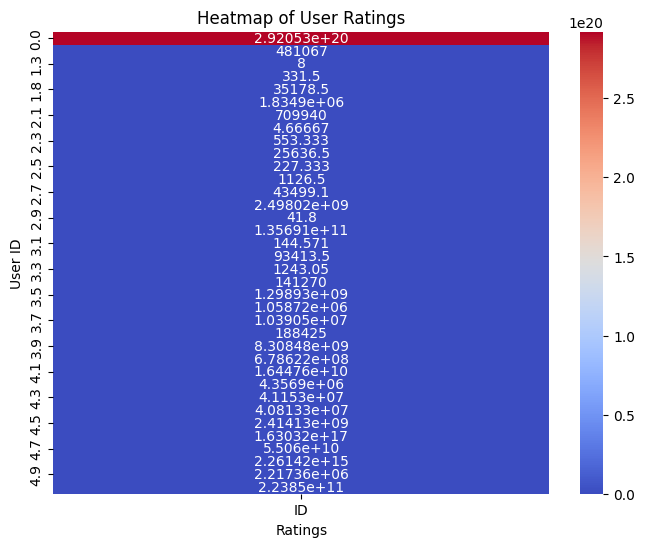

In [19]:
heatmap_data = df.pivot_table("ID", "Rating")

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title("Heatmap of User Ratings")
plt.xlabel("Ratings")
plt.ylabel("User ID")
plt.show()

Text(0.5, 1.0, 'Most popular items')

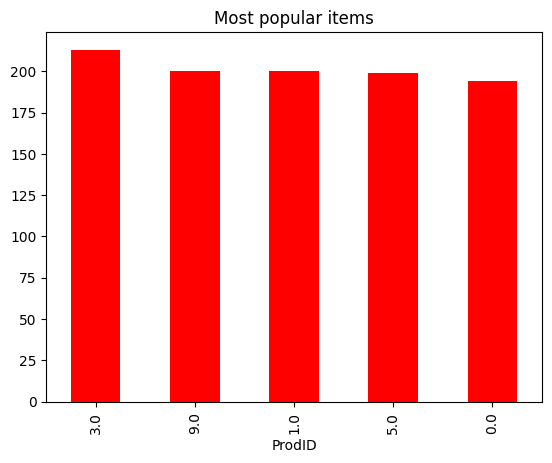

In [20]:
popular_items = df['ProdID'].value_counts().head()
popular_items.plot(kind='bar', color='red')
plt.title("Most popular items")

Text(0.5, 1.0, 'Most ratings')

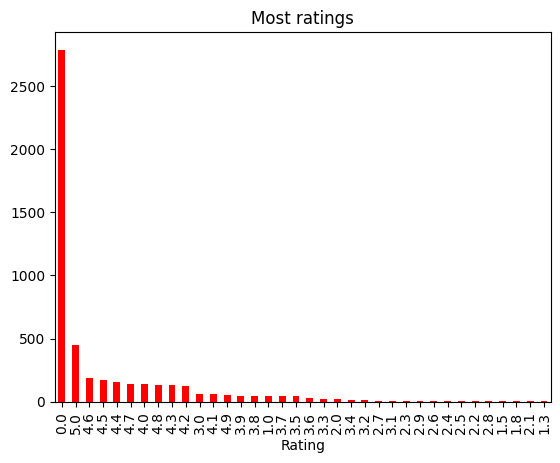

In [21]:
most_ratings = df["Rating"].value_counts()
most_ratings.plot(kind="bar", color="red")
plt.title("Most ratings")

# Data Preprocessing

In [22]:
# data cleaning and tags creation

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS and not token.is_punct]
    return ', '.join(tags)

In [23]:
columns_to_extract_tags = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags:
    df[column] = df[column].apply(preprocess)

C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\655371876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(preprocess)


In [24]:
df.head()

ID  ProdID                                           Category  \
0  1.705737e+09     2.0  premium, beauty, premium, makeup, premium, nai...   
1  9.500000e+01    76.0  beauty, hair, care, hair, color, auburn, hair,...   
2  8.000000e+00     8.0  beauty, hair, care, hair, color, permanent, ha...   
3  4.000000e+00     3.0                                beauty, makeup, lip   
4  9.900000e+02     3.0  seasonal, stock, essentials, personal, care, s...   

              Brand                                               Name  \
0               opi  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1              easy  Nice n Easy Permanent Color, 111 Natural Mediu...   
2           clairol  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  kokie, cosmetics  Kokie Professional Matte Lipstick, Hot Berry, ...   
4          gillette  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                         Description  Price  \
0                                                      8.95   
1  pack, 3, pack, 3, upc, 381519000201, beautiful...  29.86   
2  clairol, nice, n, easy, permanent, color, give...   7.99   
3  calling, matte, lip, lovers, indulge, rich, cr...   5.16   
4  1971, gillette, introduced, trac, ii, razor, s...  19.97   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                                Tags  Rating  ReviewCount  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...     0.0          0.0  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...     0.0          0.0  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...     4.5      29221.0  
3  Kokie Professional Matte Lipstick, Hot Berry, ...     0.0          0.0  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...     0.0        131.0

In [25]:
# Create New Tokens column
df["Tokens"] = df[columns_to_extract_tags].apply(lambda row: ', '.join(row), axis=1)
df.head()

C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\1302081274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tokens"] = df[columns_to_extract_tags].apply(lambda row: ', '.join(row), axis=1)


ID  ProdID                                           Category  \
0  1.705737e+09     2.0  premium, beauty, premium, makeup, premium, nai...   
1  9.500000e+01    76.0  beauty, hair, care, hair, color, auburn, hair,...   
2  8.000000e+00     8.0  beauty, hair, care, hair, color, permanent, ha...   
3  4.000000e+00     3.0                                beauty, makeup, lip   
4  9.900000e+02     3.0  seasonal, stock, essentials, personal, care, s...   

              Brand                                               Name  \
0               opi  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1              easy  Nice n Easy Permanent Color, 111 Natural Mediu...   
2           clairol  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  kokie, cosmetics  Kokie Professional Matte Lipstick, Hot Berry, ...   
4          gillette  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                         Description  Price  \
0                                                      8.95   
1  pack, 3, pack, 3, upc, 381519000201, beautiful...  29.86   
2  clairol, nice, n, easy, permanent, color, give...   7.99   
3  calling, matte, lip, lovers, indulge, rich, cr...   5.16   
4  1971, gillette, introduced, trac, ii, razor, s...  19.97   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                                Tags  Rating  ReviewCount  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...     0.0          0.0   
1  Nice 'n Easy Permanent Color, 111 Natural Medi...     0.0          0.0   
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...     4.5      29221.0   
3  Kokie Professional Matte Lipstick, Hot Berry, ...     0.0          0.0   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...     0.0        131.0   

                                              Tokens  
0  premium, beauty, premium, makeup, premium, nai...  
1  beauty, hair, care, hair, color, auburn, hair,...  
2  beauty, hair, care, hair, color, permanent, ha...  
3  beauty, makeup, lip, kokie, cosmetics, calling...  
4  seasonal, stock, essentials, personal, care, s...

In [26]:
df["Tags"][0], df["Tokens"][0]

('OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath, Wal-mart, Walmart.com',
 'premium, beauty, premium, makeup, premium, nail, polish, care, premium, nail, polish, opi, ')

In [27]:
columns_to_find_best_match = ['PreprocessedName', 'Brand', 'Category']
df['PreprocessedName'] = df["Name"].apply(preprocess)

df["Combined"] = df[columns_to_find_best_match].apply(lambda row: ', '.join(row), axis=1)
df.head()

C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\1911748974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PreprocessedName'] = df["Name"].apply(preprocess)
C:\Users\mithu\AppData\Local\Temp\ipykernel_51984\1911748974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Combined"] = df[columns_to_find_best_match].apply(lambda row: ', '.join(row), axis=1)


ID  ProdID                                           Category  \
0  1.705737e+09     2.0  premium, beauty, premium, makeup, premium, nai...   
1  9.500000e+01    76.0  beauty, hair, care, hair, color, auburn, hair,...   
2  8.000000e+00     8.0  beauty, hair, care, hair, color, permanent, ha...   
3  4.000000e+00     3.0                                beauty, makeup, lip   
4  9.900000e+02     3.0  seasonal, stock, essentials, personal, care, s...   

              Brand                                               Name  \
0               opi  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1              easy  Nice n Easy Permanent Color, 111 Natural Mediu...   
2           clairol  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  kokie, cosmetics  Kokie Professional Matte Lipstick, Hot Berry, ...   
4          gillette  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                         Description  Price  \
0                                                      8.95   
1  pack, 3, pack, 3, upc, 381519000201, beautiful...  29.86   
2  clairol, nice, n, easy, permanent, color, give...   7.99   
3  calling, matte, lip, lovers, indulge, rich, cr...   5.16   
4  1971, gillette, introduced, trac, ii, razor, s...  19.97   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                                Tags  Rating  ReviewCount  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...     0.0          0.0   
1  Nice 'n Easy Permanent Color, 111 Natural Medi...     0.0          0.0   
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...     4.5      29221.0   
3  Kokie Professional Matte Lipstick, Hot Berry, ...     0.0          0.0   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...     0.0        131.0   

                                              Tokens  \
0  premium, beauty, premium, makeup, premium, nai...   
1  beauty, hair, care, hair, color, auburn, hair,...   
2  beauty, hair, care, hair, color, permanent, ha...   
3  beauty, makeup, lip, kokie, cosmetics, calling...   
4  seasonal, stock, essentials, personal, care, s...   

                                    PreprocessedName  \
0  opi, infinite, shine, nail, lacquer, nail, pol...   
1  nice, n, easy, permanent, color, 111, natural,...   
2  clairol, nice, n, easy, permanent, color, natu...   
3  kokie, professional, matte, lipstick, hot, ber...   
4  gillette, trac, ii, plus, razor, blade, refill...   

                                            Combined  
0  opi, infinite, shine, nail, lacquer, nail, pol...  
1  nice, n, easy, permanent, color, 111, natural,...  
2  clairol, nice, n, easy, permanent, color, natu...  
3  kokie, professional, matte, lipstick, hot, ber...  
4  gillette, trac, ii, plus, razor, blade, refill...

In [28]:
df.head()

ID  ProdID                                           Category  \
0  1.705737e+09     2.0  premium, beauty, premium, makeup, premium, nai...   
1  9.500000e+01    76.0  beauty, hair, care, hair, color, auburn, hair,...   
2  8.000000e+00     8.0  beauty, hair, care, hair, color, permanent, ha...   
3  4.000000e+00     3.0                                beauty, makeup, lip   
4  9.900000e+02     3.0  seasonal, stock, essentials, personal, care, s...   

              Brand                                               Name  \
0               opi  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1              easy  Nice n Easy Permanent Color, 111 Natural Mediu...   
2           clairol  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  kokie, cosmetics  Kokie Professional Matte Lipstick, Hot Berry, ...   
4          gillette  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                         Description  Price  \
0                                                      8.95   
1  pack, 3, pack, 3, upc, 381519000201, beautiful...  29.86   
2  clairol, nice, n, easy, permanent, color, give...   7.99   
3  calling, matte, lip, lovers, indulge, rich, cr...   5.16   
4  1971, gillette, introduced, trac, ii, razor, s...  19.97   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                                Tags  Rating  ReviewCount  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...     0.0          0.0   
1  Nice 'n Easy Permanent Color, 111 Natural Medi...     0.0          0.0   
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...     4.5      29221.0   
3  Kokie Professional Matte Lipstick, Hot Berry, ...     0.0          0.0   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...     0.0        131.0   

                                              Tokens  \
0  premium, beauty, premium, makeup, premium, nai...   
1  beauty, hair, care, hair, color, auburn, hair,...   
2  beauty, hair, care, hair, color, permanent, ha...   
3  beauty, makeup, lip, kokie, cosmetics, calling...   
4  seasonal, stock, essentials, personal, care, s...   

                                    PreprocessedName  \
0  opi, infinite, shine, nail, lacquer, nail, pol...   
1  nice, n, easy, permanent, color, 111, natural,...   
2  clairol, nice, n, easy, permanent, color, natu...   
3  kokie, professional, matte, lipstick, hot, ber...   
4  gillette, trac, ii, plus, razor, blade, refill...   

                                            Combined  
0  opi, infinite, shine, nail, lacquer, nail, pol...  
1  nice, n, easy, permanent, color, 111, natural,...  
2  clairol, nice, n, easy, permanent, color, natu...  
3  kokie, professional, matte, lipstick, hot, ber...  
4  gillette, trac, ii, plus, razor, blade, refill...

# Rating Based Recommendation System

In [29]:
df.head()

ID  ProdID                                           Category  \
0  1.705737e+09     2.0  premium, beauty, premium, makeup, premium, nai...   
1  9.500000e+01    76.0  beauty, hair, care, hair, color, auburn, hair,...   
2  8.000000e+00     8.0  beauty, hair, care, hair, color, permanent, ha...   
3  4.000000e+00     3.0                                beauty, makeup, lip   
4  9.900000e+02     3.0  seasonal, stock, essentials, personal, care, s...   

              Brand                                               Name  \
0               opi  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1              easy  Nice n Easy Permanent Color, 111 Natural Mediu...   
2           clairol  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  kokie, cosmetics  Kokie Professional Matte Lipstick, Hot Berry, ...   
4          gillette  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                         Description  Price  \
0                                                      8.95   
1  pack, 3, pack, 3, upc, 381519000201, beautiful...  29.86   
2  clairol, nice, n, easy, permanent, color, give...   7.99   
3  calling, matte, lip, lovers, indulge, rich, cr...   5.16   
4  1971, gillette, introduced, trac, ii, razor, s...  19.97   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                                Tags  Rating  ReviewCount  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...     0.0          0.0   
1  Nice 'n Easy Permanent Color, 111 Natural Medi...     0.0          0.0   
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...     4.5      29221.0   
3  Kokie Professional Matte Lipstick, Hot Berry, ...     0.0          0.0   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...     0.0        131.0   

                                              Tokens  \
0  premium, beauty, premium, makeup, premium, nai...   
1  beauty, hair, care, hair, color, auburn, hair,...   
2  beauty, hair, care, hair, color, permanent, ha...   
3  beauty, makeup, lip, kokie, cosmetics, calling...   
4  seasonal, stock, essentials, personal, care, s...   

                                    PreprocessedName  \
0  opi, infinite, shine, nail, lacquer, nail, pol...   
1  nice, n, easy, permanent, color, 111, natural,...   
2  clairol, nice, n, easy, permanent, color, natu...   
3  kokie, professional, matte, lipstick, hot, ber...   
4  gillette, trac, ii, plus, razor, blade, refill...   

                                            Combined  
0  opi, infinite, shine, nail, lacquer, nail, pol...  
1  nice, n, easy, permanent, color, 111, natural,...  
2  clairol, nice, n, easy, permanent, color, natu...  
3  kokie, professional, matte, lipstick, hot, ber...  
4  gillette, trac, ii, plus, razor, blade, refill...

In [30]:
average_ratings = df.groupby(["Name", "Description", "Brand", "Price", "ImageURL"])["Rating"].mean().reset_index()

In [31]:
top_rated_products = average_ratings.sort_values(by='Rating', ascending=False)

In [32]:
rating_based_recommendations = top_rated_products.head(10)
rating_based_recommendations

Name  \
1580  Dove Purifying Detox Nourishing Body Wash Gree...   
2044  Goldwell StyleSign 1 Flat Marvel Straightening...   
2073      Groganics DHT Ice Oil Scalp Moisturizer, 4 oz   
3794                R+Co Aircraft Pomade Mousse, 5.6 Oz   
535   Alba Botanica Very Emollient Herbal Healing Bo...   
3799  RK BY KISS Creamlicious Triple Butter Matte Cr...   
1079  Candle Warmers Etc. Rustic Brown Hurricane Can...   
2058  Great Value Glass LED Globe, 3W, Daylight, 3 C...   
2048  Good Sense 60-Day Air Care System, Citrus, 2 o...   
4651  Vagisil Anti-Itch Medicated Wipes 20 Each (Pac...   

                                            Description                 Brand  \
1580  dove, purifying, detox, nourishing, body, wash...                  dove   
2044                                                                 goldwell   
2073  natural, blend, herbs, fruit, vegetables, mine...             groganics   
3794                                                                            
535   moisturize, nourish, sensitive, skin, alba, bo...        alba, botanica   
3799  rk, kiss, creamlicious, triple, butter, matte,...              rk, kiss   
1079                                                     candle, warmers, etc   
2058  illuminate, home, great, value, led, globe, bu...          great, value   
2048  convenient, air, freshener, easy, use, mainten...              diversey   
4651  free, shipping, pack, 2, pack, 2, upc, 0115090...               vagisil   

      Price                                           ImageURL  Rating  
1580   5.94  https://i5.walmartimages.com/asr/9a60fb98-eefb...     5.0  
2044  53.85  https://i5.walmartimages.com/asr/3bf90289-6980...     5.0  
2073   9.99  https://i5.walmartimages.com/asr/ed63df5f-b0a6...     5.0  
3794  28.00  https://i5.walmartimages.com/asr/03319cbe-7f61...     5.0  
535   14.99  https://i5.walmartimages.com/asr/6050a2f0-3f91...     5.0  
3799   2.30  https://i5.walmartimages.com/asr/6867b89c-9b2e...     5.0  
1079  31.83  https://i5.walmartimages.com/asr/54376245-b5c1...     5.0  
2058   5.88  https://i5.walmartimages.com/asr/164447be-edd5...     5.0  
2048  62.85  https://i5.walmartimages.com/asr/025a7068-7bb1...     5.0  
4651  16.76  https://i5.walmartimages.com/asr/9a7992bb-cab9...     5.0

In [33]:
print("Rating Based Recommendation System: (Trending Products)")
rating_based_recommendations

Rating Based Recommendation System: (Trending Products)


Name  \
1580  Dove Purifying Detox Nourishing Body Wash Gree...   
2044  Goldwell StyleSign 1 Flat Marvel Straightening...   
2073      Groganics DHT Ice Oil Scalp Moisturizer, 4 oz   
3794                R+Co Aircraft Pomade Mousse, 5.6 Oz   
535   Alba Botanica Very Emollient Herbal Healing Bo...   
3799  RK BY KISS Creamlicious Triple Butter Matte Cr...   
1079  Candle Warmers Etc. Rustic Brown Hurricane Can...   
2058  Great Value Glass LED Globe, 3W, Daylight, 3 C...   
2048  Good Sense 60-Day Air Care System, Citrus, 2 o...   
4651  Vagisil Anti-Itch Medicated Wipes 20 Each (Pac...   

                                            Description                 Brand  \
1580  dove, purifying, detox, nourishing, body, wash...                  dove   
2044                                                                 goldwell   
2073  natural, blend, herbs, fruit, vegetables, mine...             groganics   
3794                                                                            
535   moisturize, nourish, sensitive, skin, alba, bo...        alba, botanica   
3799  rk, kiss, creamlicious, triple, butter, matte,...              rk, kiss   
1079                                                     candle, warmers, etc   
2058  illuminate, home, great, value, led, globe, bu...          great, value   
2048  convenient, air, freshener, easy, use, mainten...              diversey   
4651  free, shipping, pack, 2, pack, 2, upc, 0115090...               vagisil   

      Price                                           ImageURL  Rating  
1580   5.94  https://i5.walmartimages.com/asr/9a60fb98-eefb...     5.0  
2044  53.85  https://i5.walmartimages.com/asr/3bf90289-6980...     5.0  
2073   9.99  https://i5.walmartimages.com/asr/ed63df5f-b0a6...     5.0  
3794  28.00  https://i5.walmartimages.com/asr/03319cbe-7f61...     5.0  
535   14.99  https://i5.walmartimages.com/asr/6050a2f0-3f91...     5.0  
3799   2.30  https://i5.walmartimages.com/asr/6867b89c-9b2e...     5.0  
1079  31.83  https://i5.walmartimages.com/asr/54376245-b5c1...     5.0  
2058   5.88  https://i5.walmartimages.com/asr/164447be-edd5...     5.0  
2048  62.85  https://i5.walmartimages.com/asr/025a7068-7bb1...     5.0  
4651  16.76  https://i5.walmartimages.com/asr/9a7992bb-cab9...     5.0

# Content Based Recommendation System

In [34]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tf_idf_matrix_content = tfidf_vectorizer.fit_transform(df["Tokens"])
tf_idf_matrix_content

<4958x19495 sparse matrix of type '<class 'numpy.float64'>'
	with 259129 stored elements in Compressed Sparse Row format>

In [35]:
df.iloc[4957]

ID                                                                0.0
ProdID                                                            1.0
Category            beauty, makeup, face, makeup, face, makeup, br...
Brand                                                       covergirl
Name                                                       Foundation
Description         mousse, foundation, gives, smooth, clean, natu...
Price                                                           17.94
ImageURL            https://i5.walmartimages.com/asr/a76122fd-322a...
Tags                                Foundation, Wal-mart, Walmart.com
Rating                                                            0.0
ReviewCount                                                     438.0
Tokens              beauty, makeup, face, makeup, face, makeup, br...
PreprocessedName                                           foundation
Combined            foundation, covergirl, beauty, makeup, face, m...
Name: 4957, dtype: o

In [36]:
cosine_similarities_content = cosine_similarity(tf_idf_matrix_content, tf_idf_matrix_content)
cosine_similarities_content

array([[1.        , 0.00348134, 0.00363509, ..., 0.13606203, 0.31610086,
        0.05745477],
       [0.00348134, 1.        , 0.38103964, ..., 0.0231953 , 0.00185373,
        0.03804209],
       [0.00363509, 0.38103964, 1.        , ..., 0.0395961 , 0.0019356 ,
        0.05894516],
       ...,
       [0.13606203, 0.0231953 , 0.0395961 , ..., 1.        , 0.00124047,
        0.03809882],
       [0.31610086, 0.00185373, 0.0019356 , ..., 0.00124047, 1.        ,
        0.0054833 ],
       [0.05745477, 0.03804209, 0.05894516, ..., 0.03809882, 0.0054833 ,
        1.        ]])

In [37]:
cosine_similarities_content.shape

(4958, 4958)

In [38]:
cosine_similarities_content.shape

(4958, 4958)

In [39]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = df[df['Name']==item_name].index[0]
item_index

0

In [40]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))
similar_items

[(0, 1.0),
 (1, 0.0034813446358033695),
 (2, 0.00363509035938843),
 (3, 0.013253784090362382),
 (4, 0.0010141822521748797),
 (5, 0.006572191691016938),
 (6, 0.007312949488348883),
 (7, 0.051797607059271),
 (8, 0.011111435168636375),
 (9, 0.0031409990812738026),
 (10, 0.0),
 (11, 0.15941747871327505),
 (12, 0.04143625339816913),
 (13, 0.003033101508432158),
 (14, 0.0),
 (15, 0.0059767477286479555),
 (16, 0.3387164536529459),
 (17, 0.0),
 (18, 0.004568329446709325),
 (19, 0.0038804671907438117),
 (20, 0.008763293638888364),
 (21, 0.0),
 (22, 0.009442412486366685),
 (23, 0.0),
 (24, 0.0051638414665733014),
 (25, 0.0),
 (26, 0.00718771519797022),
 (27, 0.003251053428934991),
 (28, 0.28011201133677144),
 (29, 0.0),
 (30, 0.007224352589804802),
 (31, 0.006244099464954474),
 (32, 0.008756767606731896),
 (33, 0.010740150927672831),
 (34, 0.005626718574733753),
 (35, 0.010237638260010793),
 (36, 0.0020119057726893357),
 (37, 0.00327138607263772),
 (38, 0.005142686030587102),
 (39, 0.0),
 (40, 0

In [41]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indices = [x[0] for x in top_similar_items]

In [42]:
df.iloc[recommended_items_indices][["Name", "ReviewCount", "Brand"]]

Name  ReviewCount Brand
155  OPI Nail Lacquer Polish .5oz/15mL - This Gown ...          0.0   opi
183  OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...          0.0   opi
204  OPI Nail Lacquer - Dont Bossa Nova Me Around -...          0.0   opi
235  OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...          5.0   opi
322  OPI Gel Polish Fall 2019 Scotland Collection G...          1.0   opi
371  OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...          1.0   opi
398   OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz         57.0   opi
702  OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...          1.0   opi
880  OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...          0.0   opi

In [43]:
def find_best_match(df, item_name):
    preprocessed_text = preprocess(item_name)
    item_words = set(preprocessed_text.split(", "))
    
    best_match = None
    max_common_words = 0

    for combined, name in zip(df["Combined"], df["Name"]):
        
        combined_words = set(combined.split(", "))
        common_words = item_words.intersection(combined_words)
        
        if len(common_words) >= max_common_words:
            best_match = name
            max_common_words = len(common_words)
    print(max_common_words)
    if ((max_common_words == 0) or (len(item_words) >= 3 and max_common_words <= len(item_words)/3)):
        return None
    return best_match

In [44]:
pd.set_option('display.max_colwidth', None)

df[df["Name"] == find_best_match(df, 'lipstick')].Name

1


4943    COVERGIRL Colorlicious Katy Kat Matte Lipstick, P11 Perry Panther
Name: Name, dtype: object

In [45]:
def content_based_recommendations(df, item_name, cosine_similarities_content, rating_based_recommendations, top_n=10):
    if item_name not in df["Name"].values:
        best_match = find_best_match(df, item_name)
        if not best_match:
            print("Sorry, entered item is not found! You may like: ")
            return {"isFound": False, "data":rating_based_recommendations}
    else:
        best_match = item_name

    print(best_match)
    item_index = df[df["Name"]==best_match].index
    print(item_index)
    similar_items = cosine_similarities_content[item_index]
    similar_items = list(enumerate(similar_items))
    similar_items = sorted(similar_items, key=lambda x : x[1], reverse=True)

    top_similar_items = similar_items[0:top_n+1]
    top_similar_items_indices = [x[0] for x in top_similar_items]
    return {"isFound":True, "data":df.iloc[top_similar_items_indices][["Name", "Description", "Brand", "Price", "ImageURL", "Rating"]]}

In [46]:
# Example
item_name = 'lipstick'
content_based_rec = content_based_recommendations(df, item_name, cosine_similarities_content, rating_based_recommendations, top_n=8)
content_based_rec

1
COVERGIRL Colorlicious Katy Kat Matte Lipstick, P11 Perry Panther
Index([4943], dtype='int64')


{'isFound': True,
 'data':                                                         Name Description  \
 0  OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath               
 
   Brand  Price  \
 0   opi   8.95   
 
                                                                                                       ImageURL  \
 0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4-4f38-91bb-fd19317e3e20.aae056ad1dcaab1abc7f13c21ca53440.jpeg   
 
    Rating  
 0     0.0  }

# Collaborative Filtering

In [47]:
user_item_matrix = df.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0).astype(int)
user_item_matrix

ProdID        0.000000e+00  1.000000e+00  2.000000e+00  3.000000e+00  \
ID                                                                     
0.000000e+00             2             1             1             1   
1.000000e+00             1             0             2             2   
2.000000e+00             1             1             3             1   
3.000000e+00             1             1             1             2   
4.000000e+00             3             0             2             1   
...                    ...           ...           ...           ...   
9.967409e+13             0             0             0             0   
6.094514e+14             0             0             0             0   
3.007694e+17             0             0             0             0   
3.081297e+19             0             0             0             0   
8.148290e+23             0             0             0             0   

ProdID        4.000000e+00  5.000000e+00  6.000000e+00  7.000000e+00  \
ID                                                                     
0.000000e+00             1             0             2             1   
1.000000e+00             0             2             3             2   
2.000000e+00             2             1             0             2   
3.000000e+00             0             3             1             0   
4.000000e+00             1             1             0             2   
...                    ...           ...           ...           ...   
9.967409e+13             0             0             0             0   
6.094514e+14             0             0             0             0   
3.007694e+17             0             0             0             0   
3.081297e+19             0             0             0             0   
8.148290e+23             0             0             0             0   

ProdID        8.000000e+00  9.000000e+00  ...  1.007940e+42  1.007940e+42  \
ID                                        ...                               
0.000000e+00             1             1  ...             0             0   
1.000000e+00             0             2  ...             0             4   
2.000000e+00             1             1  ...             0             2   
3.000000e+00             0             3  ...             0             0   
4.000000e+00             1             3  ...             0             1   
...                    ...           ...  ...           ...           ...   
9.967409e+13             0             0  ...             0             0   
6.094514e+14             0             0  ...             0             0   
3.007694e+17             0             0  ...             0             0   
3.081297e+19             4             0  ...             0             0   
8.148290e+23             0             0  ...             0             0   

ProdID        1.008730e+42  1.030521e+42  1.030521e+42  1.030521e+42  \
ID                                                                     
0.000000e+00             0             0             0             0   
1.000000e+00             0             0             5             0   
2.000000e+00             0             0             0             0   
3.000000e+00             0             0             0             0   
4.000000e+00             0             0             0             0   
...                    ...           ...           ...           ...   
9.967409e+13             0             0             0             0   
6.094514e+14             0             0             0             0   
3.007694e+17             0             0             0             0   
3.081297e+19             0             0             0             0   
8.148290e+23             0             0             0             0   

ProdID        1.076430e+42  3.002240e+42  5.002240e+42  5.005509e+42  
ID                                                                    
0.000000e+00             5             0     

In [48]:
user_similarity = cosine_similarity(user_item_matrix)

In [49]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [50]:
user_similarities = user_similarity[target_user_index]
user_similarities

array([0.06575602, 0.0920999 , 0.04336465, ..., 0.        , 0.03691067,
       0.        ])

In [51]:
similar_user_indices = user_similarities.argsort()[::-1]
similar_user_indices

array([   4,   84, 1545, ..., 1098, 1099,  855], dtype=int64)

In [52]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_item_details = df[df['ProdID'].isin(recommend_items)][["Name", "Description", "Brand", "Price", "ImageURL", "Rating"]]

In [53]:
recommended_item_details

Name  \
15                                                          Clairol Natural Instincts Demi-Permanent Hair Color Crème 6R Light Auburn, 1 Application   
33                                                                                 DenTek Kids Fun Flossers, Removes Food & Plaque, 75 Count, 3 Pack   
61                                                                                 COVERGIRL Exhibitionist Cream Lipstick, 395 Darling Kiss, 0.12 oz   
64                                                           Neutrogena SkinClearing Oil-Free Liquid Foundation Acne Fighting, 135 Chestnut, 1 fl oz   
69                                                                Design Essentials Natural Coconut & Monoi Curl Enhancing Dual Hydration Milk, 8 oz   
...                                                                                                                                              ...   
4941                                                                      Covidien Simplicity Underpad - 7136CS - 23&quot x 24&quot, 200 Each / Case   
4945  2oz - Artizen Breathe Blend Essential Oil (100% Pure & Natural - UNDILUTED) Therapeutic Grade - Huge 2 Ounce Bottle - Perfect for Aromatherapy   
4948                                                                        2 Pack - Crest 3D White Brilliance Fluoride Anticavity Toothpaste 4.1 oz   
4954                                                                Garnier Nutrisse Nourishing Hair Color Creme (Browns), 41 Dark Nude Brown, 1 kit   
4957                                                                                                                                      Foundation   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Description  \
15                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [54]:
def collaborative_filtering_recommendations(df, target_user_id, user_item_matrix, user_similarity, rating_based_recommendations, top_n=10):
    # Find the index of the target user
    try:
        target_user_index = user_item_matrix.index.get_loc(target_user_id)
    except:
        print("User record not found. You may like: ")
        return {"isFound":False, "data":rating_based_recommendations}
    
    # Get similarity scores for the target user
    user_similarities = user_similarity[target_user_index]
    
    # Get indices of similar users, sorted by similarity (excluding the target user)
    similar_user_indices = user_similarities.argsort()[::-1][1:]
    
    recommended_items = []
    recommended_item_details = []
    
    for user_index in similar_user_indices:
        if len(recommended_items) >= top_n:
            break
        
        # Get the ratings of the similar user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        
        # Get items not rated by the target user
        not_rated_by_target_user = (user_item_matrix.iloc[target_user_index] == 0)
        
        # Get items rated by similar user and not by target user
        potential_recommendations = rated_by_similar_user[not_rated_by_target_user & (rated_by_similar_user > 0)]
        
        # Add the potential recommendations to the list
        for item in potential_recommendations.index:
            if len(recommended_items) < top_n and item not in recommended_items:
                recommended_items.append(item)
                
                # Get item details
                item_details = df[df["ProdID"] == item][["Name", "Description", "Brand", "Price", "ImageURL", "Rating"]].drop_duplicates().iloc[0]
                recommended_item_details.append(item_details)
    
    # Convert the recommended item details to a DataFrame
    recommended_item_details_df = pd.DataFrame(recommended_item_details).head(top_n)
    
    return {"isFound":True, "data":recommended_item_details_df}

In [55]:
# example
target_user_id = 100
top_n = 10
collaborative_filtering_rec = collaborative_filtering_recommendations(df, target_user_id, user_item_matrix, user_similarity, rating_based_recommendations, top_n)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 10 recommendations for User 100:


{'isFound': True,
 'data':                                                                                                                                                                          Name  \
 1597  Kiss My Face Babys First Kiss SPF 50 Broad Spectrum Mineral Sunscreen Lotion, 4 oz., Safe for Babys Skin, Mineral Active Ingredients, Moisturizing Lotion, Safe Suncare   
 3884                                                                                                                                                GiGi All Purpose Wax 14oz   
 3                                                                                                                    Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz   
 371                                                                                 OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Combo - Base, Top & Tagus in That Selfie! L18   
 15                                                                                 

# Hybrid based recommendations

In [56]:
def hybrid_recommendations(df, target_user_id, item_name,  cosine_similarities_content, user_item_matrix, user_similarity, rating_based_recommendations, top_n=10):
    content_based_rec = content_based_recommendations(df, item_name, cosine_similarities_content, rating_based_recommendations, top_n)
    
    collaborative_filtering_rec = collaborative_filtering_recommendations(df, target_user_id, user_item_matrix, user_similarity, rating_based_recommendations, top_n)
    
    if content_based_rec['isFound'] and collaborative_filtering_rec['isFound']:
        hybrid_rec = pd.concat([content_based_rec['data'], collaborative_filtering_rec['data']]).drop_duplicates()
        return {"isFound":True, 'data':hybrid_rec.head(10)}
    elif content_based_rec['isFound']:
        return {"isFound":True, 'data':content_based_rec['data']}
    elif collaborative_filtering_rec['isFound']:
        return {"isFound":True, 'data':collaborative_filtering_rec['data']}
    else:
        return {"isFound":False, "data":rating_based_recommendations}

In [57]:
# Example
target_user_id = 4
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
hybrid_rec = hybrid_recommendations(df, target_user_id, item_name,  cosine_similarities_content, user_item_matrix, user_similarity, rating_based_recommendations, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath
Index([0], dtype='int64')
Top 10 Hybrid Recommendations for User 4 and Item 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath':


{'isFound': True,
 'data':                                                                                           Name  \
 0                                    OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath   
 2317                            MagniLife Leg & Back Pain Relief Dissolving Tablets, 125 count   
 15    Clairol Natural Instincts Demi-Permanent Hair Color Crème 6R Light Auburn, 1 Application   
 33                           DenTek Kids Fun Flossers, Removes Food & Plaque, 75 Count, 3 Pack   
 143                Covidien Curity Maternity Pad Heavy 4.33&quot x 12.25&quot (Bag of 14 Pads)   
 144                                                       Revlon Colorburst Balm Stain - Crush   
 155                         OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11   
 288     LOreal Excellence Creme - 9-1/2NB Lightest Natural Blonde (Natural) 1 Each (Pack of 3)   
 675                                             Egyptian Magic All Purpose Skin Cr

In [58]:
user_ids = df["ID"].unique()
user_ids

array([1.70573679e+09, 9.50000000e+01, 8.00000000e+00, ...,
       3.38063000e+05, 4.49000000e+02, 2.77100000e+03])

In [59]:
import pickle


data = {
    'top_rated_products': top_rated_products,
    'user_ids': user_ids,
    'df': df,
    'cosine_similarities_content': cosine_similarities_content,
    'user_item_matrix': user_item_matrix,
    'user_similarity': user_similarity,
    'rating_based_recommendations':  rating_based_recommendations
}

with open("data.pkl", "wb") as f:
    pickle.dump(data, f)